##### Importing necessary libraries

In [111]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to make this notebook's output identical/stable across runs
np.random.seed(7)

# set up numpy to display precision upto 3 decimal places and suppresses the use of scientific notation for small numbers
#np.set_printoptions(precision=3, suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

pd.set_option('display.max_columns', None) # show all columns in a Pandas DataFrame
pd.set_option('display.max_rows', None)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80
plt.rcParams['image.cmap'] = "gray"

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
#warnings.filterwarnings(action='ignore', category=DeprecationWarning, module='sklearn')
#warnings.filterwarnings(action='ignore', category=FutureWarning, module='sklearn')

In [112]:
import numpy as np                                      #Numpy Library
import pandas as pd                                     #Pandas Library
import matplotlib.pyplot as plt                         #Matplotlib for pretty graphs
import seaborn as sns                                   #Seaborn for pretty graphs
from sklearn.cluster import KMeans                      #Kmeans
from sklearn.utils import shuffle                       #Library for shuffling the dataset
from sklearn.preprocessing import StandardScaler        #Library for scaling the data
from sklearn.cluster import AgglomerativeClustering     #Clustering 
from scipy.cluster.hierarchy import linkage             #Linkage Matrix
from scipy.cluster.hierarchy import dendrogram          #Dendogram 
from sklearn.neighbors import KNeighborsClassifier      #Nearest Neighbor
from scipy.optimize import linear_sum_assignment        #Sum
from sklearn.metrics import silhouette_score            #Metrics


import warnings
warnings.filterwarnings('ignore')

##### Loading the Dataset

In [113]:
# training data
train_set = shuffle(pd.read_csv("/Users/harshitchandrol/Documents/SEM 2 /Advance Data Mining /Project /HAR/train.csv"))
# test data
test_set = shuffle(pd.read_csv("/Users/harshitchandrol/Documents/SEM 2 /Advance Data Mining /Project /HAR/test.csv"))
# training data index 
train_set['index'] = train_set.index
#test data index
test_set['index'] = test_set.index

In [115]:
# Checking samples training data
train_set.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [117]:
# Checking shape of training and test data
print("Train set shape: ",train_set.shape)
print("Test set shape: ",test_set.shape)

Train set shape:  (7352, 564)
Test set shape:  (2947, 564)


In [118]:
# Checking null values in training and testing data
print("train set:",train_set.isnull().values.any())
print("test set:",test_set.isnull().values.any())

train set: False
test set: False


In [119]:
# Number of values per acitivity in training data
train_set["Activity"].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

We can observe that the activities are fairly balanced from the table above. For better observation, a pie chart can be drawn.

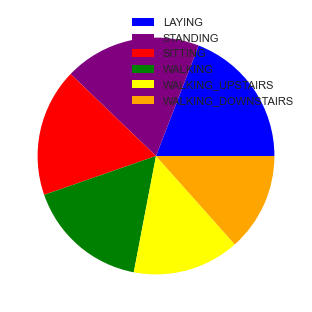

In [120]:
# lets look at the Activities counts using a pie chart
activities = train_set["Activity"].value_counts() #value counts per activity 
labels = activities.index       #set index to labels
values = activities.values      #set values to values

colors = ['blue','purple', 'red', 'green','yellow', 'orange'] # set colors for activities
patches, texts = plt.pie(values, colors=colors) #set values and patches based on counts and colors assigned
plt.legend(patches, labels)                     #set legends 
plt.tight_layout()                              #set a tight layout for better look of te pei graph
plt.show()                                      # show the graph

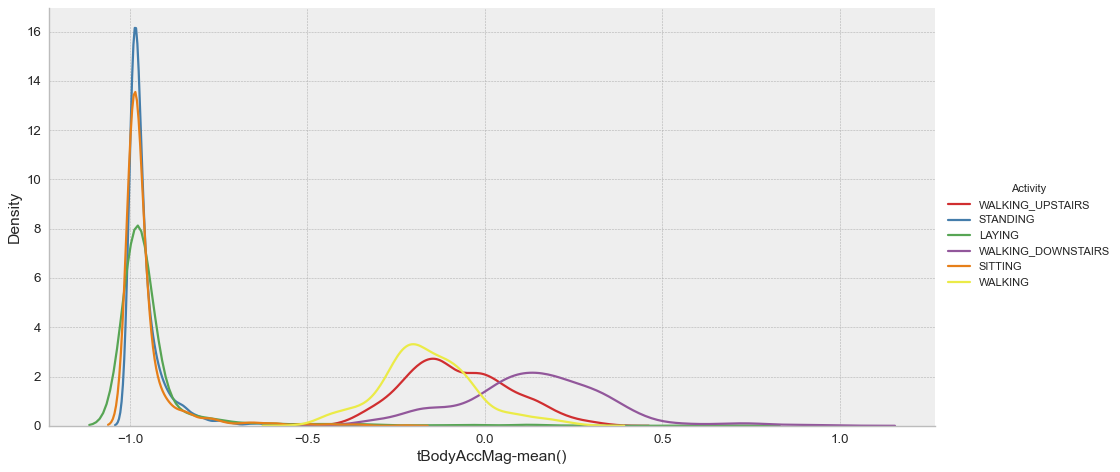

In [121]:
#checing the dunamic and static activites of humans using a line grapf
sns.set_palette("Set1", desat=0.80)                 # set a palette
facetgrid = sns.FacetGrid(train_set, hue='Activity', size=6,aspect=2)  
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False)\       # mapping with legends
    .add_legend()

Motion information will not be particularly helpful during static actions (sit, stand, or lie down).

Motion information will be important in the dynamic activities (walking, walking upstairs, and downstairs).

To better understand the static and dynamic activities of humans, we can utilize the "tBodyAccMagmean" (tBody acceleration magnitude feature mean value) function to produce the graph.

##### Splitting the train and test data into X_train,X_test,y_train,y_test

In [122]:
y_train = train_set["Activity"]                              #Acivity label into y_train from training data
X_train = train_set.drop(["Activity","subject"], axis=1)     #All features into X_train from train data

y_test = test_set["Activity"]                                #Activity label into y_test from test data
X_test = test_set.drop(["Activity","subject"], axis=1)       # All features into X_test from test data

##### Scaling the data
Standardizing features by removing the mean and scaling to unit variance z=(x-u)/s.
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data.

In [123]:
# Scaling the data using StandardScalar from sklearn
scaler = StandardScaler()           #creating a standardscalar object
for col in X_train.columns:         #hovering through all columns in train data to transform them using fit_transform method
    X_train[col]  = scaler.fit_transform(X_train[[col]])
for col in X_test.columns:          #hovering through all columns in test data to transform them using fit_transform method
    X_test[col]  = scaler.fit_transform(X_test[[col]])


##### Model execution

#### KMeans
One of the most used unsupervised machine learning methods, K-Means clustering divides data into groups depending on how similar the individual data examples are.

In [124]:
inertia = []                 #Creating an empty intertia List object
## Inertia measures how well a dataset was clustered by K-Means. 
##It is calculated by measuring the distance between each data point and its centroid, 
##squaring this distance, and summing these squares across one cluster. 
##A good model is one with low inertia AND a low number of clusters ( K )
#first considering 8 clusters
for nr in range(1 , 9):          #initiating a for loop to execute model learning with 8 clusters
    model = (KMeans(n_clusters = nr, random_state= 111  , algorithm='elkan') )  #using "Elkan Algorithm" for our analysis
    model.fit(X_train)                                # fit the data to our model
    inertia.append(model.inertia_)                    # append indivsual inertia values to our interia list

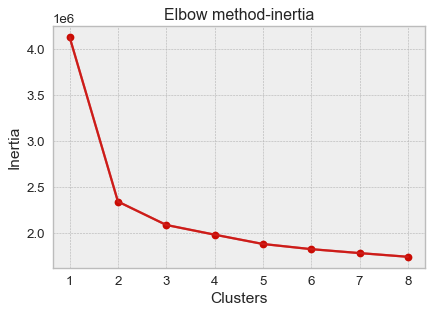

In [126]:
# let us plot the inertia to see and observe the best n_cluster for our model
plt.plot(np.arange(1 ,9) , inertia , 'ro-')           
plt.plot(np.arange(1 , 9) , inertia , alpha = 0.5)
plt.xlabel('Clusters') , plt.ylabel('Inertia')
plt.title("Elbow method-inertia")
plt.show()

From this plot, we can observe that the elbow (point after the inertia decreases much slower) is obtained at 2 clusters. So we will run the algorithm with 2 clusters i.e. n_cluster argument =2

In [127]:
km2 = KMeans(n_clusters=2,algorithm="elkan",random_state=111).fit(X_train)   # ft the training data

Text(0.5, 1.0, 'Actual values')

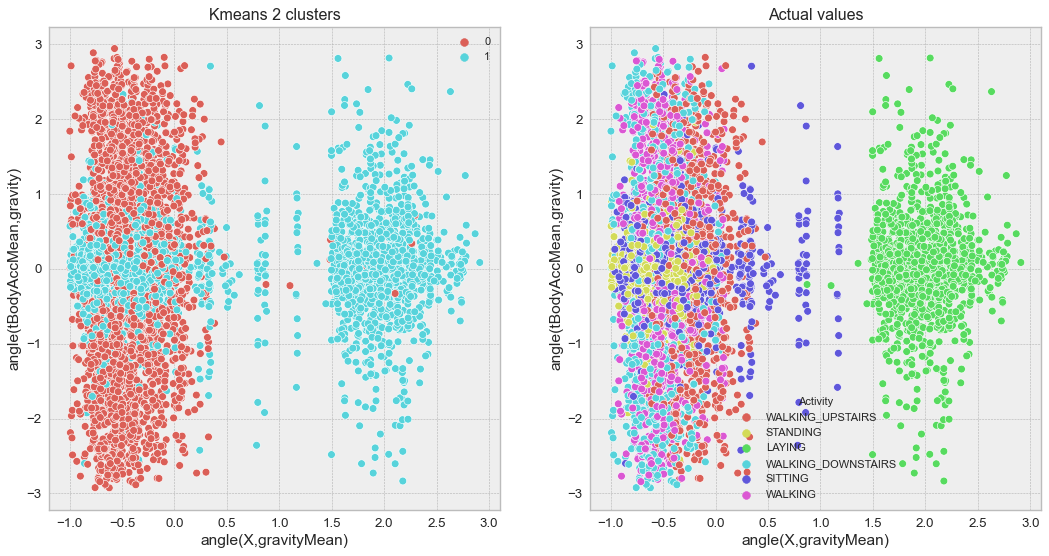

In [128]:
#predicting the test data using the model with 2 clusters
y_pred_2 = km2.labels_   # having the labels from our model into y_pred_2 variable
f, axes = plt.subplots(1, 2)        # subplot
f.set_figheight(8)                  # plot height
f.set_figwidth(16)                  # plot width
# plota scatter plot using sns library
sns.scatterplot(X_train["angle(X,gravityMean)"], X_train["angle(tBodyAccMean,gravity)"], y_pred_2, 
                palette=sns.color_palette('hls', 2), ax=axes[0]).set_title("Kmeans 2 clusters")
sns.scatterplot(X_train["angle(X,gravityMean)"], X_train["angle(tBodyAccMean,gravity)"], y_train, 
                palette=sns.color_palette('hls', 6), ax=axes[1]).set_title("Actual values")


I believe that selecting 2 as the value for k will divide the data into two clusters: one for all walking actions and the other for lying, sitting, and standing.

#### Lets check the performance 

Since the dataset has labels, I ll evaluate the model using them. To achieve that, I will match the labels with the clusters computing a confusion matrix

Change y_train to have only 2 classes to check the performancee with 2 clusters of static and dynamic human activites

In [129]:
def two_labels(dataset):                               #defining a function to categorize static activity to 0 and dynamic activity to 1
    dataset_copied = dataset.copy()
    for label in range(len(dataset)):
        if dataset[label] == "SITTING":
            dataset[label] = 0
        elif dataset[label] == "LAYING":
            dataset[label] = 0
        elif dataset[label] == "STANDING":
            dataset[label] = 0
        elif dataset[label] == "WALKING_UPSTAIRS":
            dataset[label] = 1
        elif dataset[label] == "WALKING_DOWNSTAIRS":
            dataset[label] = 1
        elif dataset[label] == "WALKING":
            dataset[label] = 1
    return dataset_copied, dataset
y_train, y_train_2 = two_labels(y_train)
y_test, y_test_2 = two_labels(y_test)

In [130]:
#checking the confusion matrix
conf_matrix = np.zeros((2,2))
for train_label, pred_label in zip(y_train_2.values, y_pred_2):
    conf_matrix[train_label][pred_label] +=1
    
row_ind, col_ind = linear_sum_assignment(1/conf_matrix)

interpret = dict(zip(col_ind, row_ind))
predicted_labels = np.array([interpret[label]
                            for label in y_pred_2])
print(np.mean(predicted_labels == y_train_2))

0.9972796517954298


##### Checking the Performance on test set

In [131]:
test_pred = np.array([interpret[label] for label in km2.predict(X_test)])
print(np.mean(test_pred == y_test_2))

0.998642687478792


Both performances on train and test have very almost similar values 

##### K means 6 clusters¶

Let's consider clustering the data points in the exact number of clusters that exists in our dataset, n_cluster =6

In [132]:
# fit data to 6 cluster Kmeans algorithm
km6 = KMeans(n_clusters=6, algorithm='elkan', random_state= 111, tol=0.01).fit(X_train) 

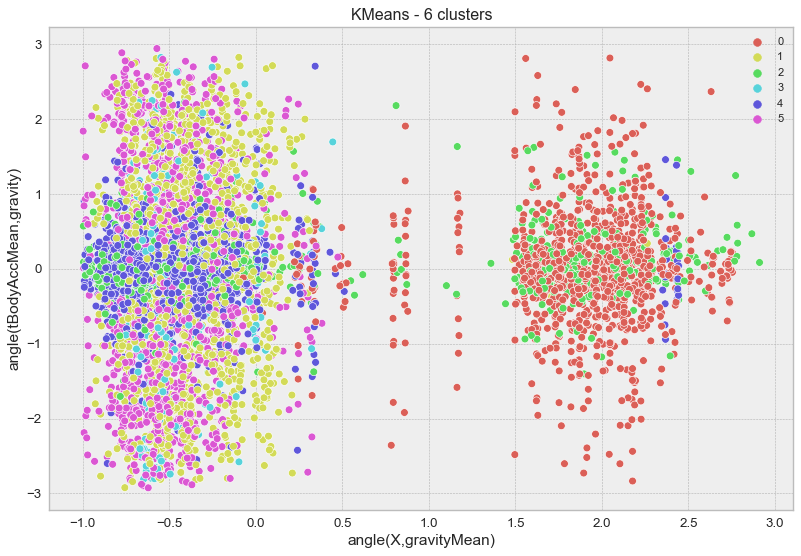

In [133]:
#Plot the scatter plot to visualize the ditribution
y_pred_6 = km6.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X_train["angle(X,gravityMean)"], X_train["angle(tBodyAccMean,gravity)"],y_pred_6, 
                palette=sns.color_palette('hls',6))
plt.title('KMeans - 6 clusters')
plt.show()

looks difficult to categorize them using 6 clusters

lets check the performance for 6 clusters approach!

In [134]:
def six_labels(dataset):
    dataset_copied = dataset.copy()
    for label in range(len(dataset)):
        if dataset[label] == "SITTING":
            dataset[label] = 0
        elif dataset[label] == "LAYING":
            dataset[label] = 1
        elif dataset[label] == "STANDING":
            dataset[label] = 2
        elif dataset[label] == "WALKING_UPSTAIRS":
            dataset[label] = 3
        elif dataset[label] == "WALKING_DOWNSTAIRS":
            dataset[label] = 4
        elif dataset[label] == "WALKING":
            dataset[label] = 5
    return dataset_copied,dataset
y_train, y_train_6 = six_labels(y_train)
y_test, y_test_6 = six_labels(y_test)

In [135]:
conf_matrix_6 = np.zeros((6,6))
for train_label, label in zip(y_train_6.values, y_pred_6):
    conf_matrix_6[train_label][label] +=1
    
row_ind, col_ind = linear_sum_assignment(1/conf_matrix_6)

interpret = dict(zip(col_ind, row_ind))
predicted_labels = np.array([interpret[label]
                            for label in y_pred_6])
print(np.mean(predicted_labels == y_train_6))

0.530739934711643


Performance on test data

In [137]:
test_pred_6 = np.array([interpret[label] for label in km6.predict(X_test)])
print(np.mean(test_pred_6 == y_test_6))

0.5697319307770614


~53% accuracy for the 6 clusters approach on train data and ~56% accuracy on test data. which is a decent score!

#### Hyperparameter Tuning
Finding the optimal combination of hyperparameters to enhance the model's performance is known as hyperparameter tuning (or hyperparameter optimization). It operates by conducting numerous trials within a single training procedure.

In [138]:
# Performing GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV     # importing GridSearchCV

kmeans = KMeans() # creating a Kmeans object

#setting the parameters for grid search
parameters = {
    'init': ['k-means++', "random"],    #init - set the initial cluster centriods
    'algorithm': ["auto", "full", "elkan"], #setting different algorithms within paramete to check on all of them
    'tol': [0.0001, 0.001, 0.01]           # setting a tol parameter to different values
    }
#initiate a grid search
grid = GridSearchCV(kmeans, param_grid = parameters, scoring='completeness_score', cv=5) #performing gridseach with Kmeans
grid.fit(X_train,y_train_6)  #fiting the data to perform grid search

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'algorithm': ['auto', 'full', 'elkan'],
                         'init': ['k-means++', 'random'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='completeness_score')

In [139]:
print("Tuned Hyperparameters :", grid.best_params_)  #get the best parameter across all the parameters assigned
print("Accuracy :",grid.best_score_)                 # get the best score across all the parameters used

Tuned Hyperparameters : {'algorithm': 'auto', 'init': 'k-means++', 'tol': 0.0001}
Accuracy : 0.5487233727904006


After trying the best parameters from gridsearch, I concluded that the performance can't be improved with an significant value, because at each run, the best params changed, only 'tol' remaining consistent at 0.01. The 'init' and 'algorithm' parameters changed during the trials and had all the values possible. This can mean that the performance cannot be improved much and is a matter of chance for one of the value to be considered the best.

#### Hierarchical Clustering
Data are grouped into groups in a tree structure in a hierarchical clustering method. Every data point is first treated as a separate cluster in a hierarchical clustering process. The following steps are then repeatedly carried out by it:

Choose the two clusters that are the most similar to one another, then merge them. These procedures must be repeated until all of the clusters are combined.

Hierarchical clustering is an unsupervised algorithm which aims to create clusters that have predominant ordering from top to bottom.





In [142]:
# initiating heirarchical clustering with different methods available
hierarchical_c_ward = linkage(X_train, method = "ward") #ward
hierarchical_c_complete = linkage(X_train, "complete")  #complete
hierarchical_c_average = linkage(X_train, "average")    #average
hierarchical_c_single = linkage(X_train, "single")      #single

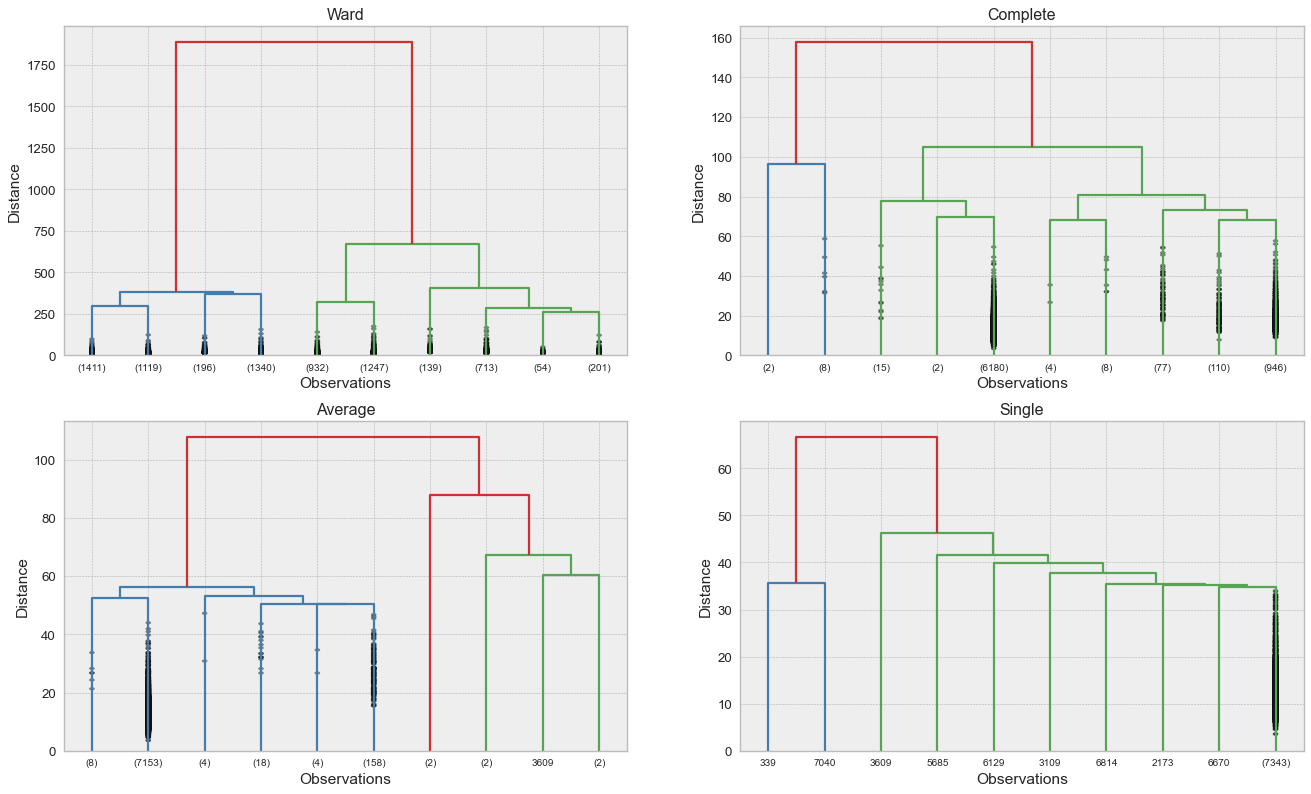

In [143]:
#plotting the dendogram for each methos used. 
plt.figure(figsize = (20,12))

#for ward method
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hierarchical_c_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 9, show_contracted = True)

#for Complete method
plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hierarchical_c_complete, truncate_mode = "lastp",p = 10, leaf_font_size = 9, show_contracted = True)

#for Average method
plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hierarchical_c_average, truncate_mode = "lastp",p = 10, leaf_font_size = 9, show_contracted = True)

#for Single method
plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hierarchical_c_single, truncate_mode = "lastp",p = 10, leaf_font_size = 9, show_contracted = True);

we can see the respective dendograms above and observe how the clusters are defined based on the number of observations.

In [144]:
# lets look at the silhouette scores for each each number of clusters in agglomerative clustering
##silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
range_clusters = range(2,8)
for nr_clusters in range_clusters:
    Agg_model = AgglomerativeClustering(n_clusters=nr_clusters)
    Agg_model.fit(X_train)
    agg_labels = Agg_model.labels_
    silhouette_sc = silhouette_score(X_train, agg_labels)
    print(f"The silhouette score is {silhouette_sc} for {nr_clusters} clusters.")

The silhouette score is 0.3952727379847026 for 2 clusters.
The silhouette score is 0.31133322718886364 for 3 clusters.
The silhouette score is 0.30336106559390735 for 4 clusters.
The silhouette score is 0.13509971761437803 for 5 clusters.
The silhouette score is 0.13171908171651153 for 6 clusters.
The silhouette score is 0.08150819426376173 for 7 clusters.


Using silhouette_score for chossing the number of clusters in hierarchical clustering case, it can be observed that also 2 is the optimal number of clusters

In [145]:
#hence we can perform Agglomerative clustering with 2 clusters 
Agg_model_2 = AgglomerativeClustering(n_clusters=2)  #initiatinga a agglomerative clustering object
Agg_model_2.fit(X_train)                             # training the model
y_pred_agg_2 = Agg_model_2.labels_                   # obtaining the labels from the model


In [146]:
# plotting the confusion matrix for agglomerative clustering
conf_matrix_agg_2 = np.zeros((2,2))
for train_label, label in zip(y_train_2.values, y_pred_agg_2):
    conf_matrix_agg_2[train_label][label] +=1
    
row_ind, col_ind = linear_sum_assignment(1/conf_matrix_agg_2)

interpret = dict(zip(col_ind, row_ind))
train_pred_agg_2 = np.array([interpret[label]
                            for label in y_pred_agg_2])
print(np.mean(train_pred_agg_2 == y_train_2))

0.9998639825897715


##### Build a KNN model in order to be able to predict on test data

In [147]:
knn_2 = KNeighborsClassifier(n_neighbors=2)
model_knn_2 = knn_2.fit(X_train,y_pred_agg_2)
y_test_predict_2 = model_knn_2.predict(X_test)

In [148]:
test_pred_agg_2 = np.array([interpret[label] for label in y_test_predict_2])
print(np.mean(test_pred_agg_2 == y_test_2))

0.999660671869698


##### Hierarchical clustering - 6 clusters

In [149]:
Agg_model_6 = AgglomerativeClustering(n_clusters=6)
Agg_model_6.fit(X_train)
y_pred_agg_6 = Agg_model_6.labels_

In [150]:
conf_matrix_agg_6 = np.zeros((6,6))
for train_label, label in zip(y_train_6.values, y_pred_agg_6):
    conf_matrix_agg_6[train_label][label] +=1
    
row_ind, col_ind = linear_sum_assignment(1/conf_matrix_agg_6)

interpret = dict(zip(col_ind, row_ind))
train_pred_agg_6 = np.array([interpret[label]
                            for label in y_pred_agg_6])
print(np.mean(train_pred_agg_6 == y_train_6))

0.54379760609358


KNN model for testing the performance for the 6 clusters approach

In [151]:
knn_6 = KNeighborsClassifier(n_neighbors=2)
model_knn_6 = knn_6.fit(X_train,y_pred_agg_6)
y_test_predict_6 = model_knn_6.predict(X_test)

In [152]:
test_pred_agg_6 = np.array([interpret[label] for label in y_test_predict_6])
print(np.mean(test_pred_agg_6 == y_test_6))

0.5324058364438412


we can see that, the performances for the Hierarchical clustering are similar to the Kmeans using 6 cluster technique

Hence, after performing the unsupervised learning in out dataset with different values of custers and parameters, we have decent scores to categorixe the data into different labels. however this is not an optimal technique to get the desired results. 